In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Load datasets
drugs_df = pd.read_csv("drugs_catalog.csv")
sales_df = pd.read_csv("sales_data.csv")
revenue_df = pd.read_csv("revenue_data.csv")

# Display the first few rows
drugs_df.head(), sales_df.head(), revenue_df.head()


(  Drug_ID        Category Manufacturer  Dosage_mg  Price_per_Unit  \
 0     D-1  Cardiovascular     Novartis        168          277.10   
 1     D-2      Antibiotic      Moderna        115           19.89   
 2     D-3      Antibiotic       Pfizer        124          460.38   
 3     D-4  Cardiovascular     Novartis         86           82.77   
 4     D-5  Antidepressant        Roche        152          441.37   
 
        Drug_Name  
 0       Losartan  
 1    Ceftriaxone  
 2   Azithromycin  
 3     Amlodipine  
 4  Amitriptyline  ,
   Sale_ID Drug_ID  Quantity_Sold  Revenue   Sale_Date      Region
 0     S-1  D-9318             17  3076.38  2020-12-11      London
 1     S-2  D-6071             66   100.60  2020-03-18   Liverpool
 2     S-3  D-5138             53  3448.49  2022-05-04  Birmingham
 3     S-4  D-1957             26  1541.58  2022-01-30  Birmingham
 4     S-5  D-6772             18  4777.54  2021-11-24  Manchester,
   Revenue_ID Drug_ID  Year  Total_Revenue
 0        R

In [15]:
# Check for missing values in each dataset
print("Missing Values in Drugs Dataset:")
print(drugs_df.isnull().sum())

print("\nMissing Values in Sales Dataset:")
print(sales_df.isnull().sum())

print("\nMissing Values in Revenue Dataset:")
print(revenue_df.isnull().sum())

# Fill or drop missing values (if any)
sales_df.dropna(inplace=True)
revenue_df.dropna(inplace=True)

# Confirm missing values are removed
print("\nAfter Cleaning:")
print(sales_df.isnull().sum(), revenue_df.isnull().sum())


Missing Values in Drugs Dataset:
Drug_ID           0
Category          0
Manufacturer      0
Dosage_mg         0
Price_per_Unit    0
Drug_Name         0
dtype: int64

Missing Values in Sales Dataset:
Sale_ID          0
Drug_ID          0
Quantity_Sold    0
Revenue          0
Sale_Date        0
Region           0
dtype: int64

Missing Values in Revenue Dataset:
Revenue_ID       0
Drug_ID          0
Year             0
Total_Revenue    0
dtype: int64

After Cleaning:
Sale_ID          0
Drug_ID          0
Quantity_Sold    0
Revenue          0
Sale_Date        0
Region           0
dtype: int64 Revenue_ID       0
Drug_ID          0
Year             0
Total_Revenue    0
dtype: int64


In [16]:
# Merge sales data with drug details
sales_merged = sales_df.merge(drugs_df, on="Drug_ID", how="left")

# Merge revenue data
sales_revenue_merged = sales_merged.merge(revenue_df, on="Drug_ID", how="left")

# Check structure
sales_revenue_merged.head()


,Sale_ID,Drug_ID,Quantity_Sold,Revenue,Sale_Date,Region,Category,Manufacturer,Dosage_mg,Price_per_Unit,Drug_Name,Revenue_ID,Year,Total_Revenue
0,S-1,D-9318,17,3076.38,2020-12-11,London,Diabetes,Roche,475,94.53,Sitagliptin,NaN,NaN,NaN
1,S-2,D-6071,66,100.60,2020-03-18,Liverpool,Antibiotic,GSK,418,34.09,Doxycycline,R-3340,2019.0,1795819.70
2,S-3,D-5138,53,3448.49,2022-05-04,Birmingham,Antibiotic,Pfizer,163,237.63,Doxycycline,NaN,NaN,NaN
3,S-4,D-1957,26,1541.58,2022-01-30,Birmingham,Antidepressant,GSK,301,18.84,Mirtazapine,R-7774,2021.0,706975.06
4,S-5,D-6772,18,4777.54,2021-11-24,Manchester,Antidepressant,Novartis,302,322.93,Sertraline,R-3491,2019.0,1409429.52


Top 5 Best-Selling Drugs:
        Drug_Name  Quantity_Sold
28      Ramipril          23740
18  Itraconazole          22769
2     Amlodipine          22167
11   Doxycycline          21921
5   Atorvastatin          21780

Bottom 5 Worst-Selling Drugs:
        Drug_Name  Quantity_Sold
20  Levofloxacin          17595
17       Insulin          17359
23     Metformin          17290
25   Mirtazapine          16921
33      Tramadol          16889


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_30200\3363893736.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_selling.head(10)["Drug_Name"], y=best_selling.head(10)["Quantity_Sold"], palette="viridis")


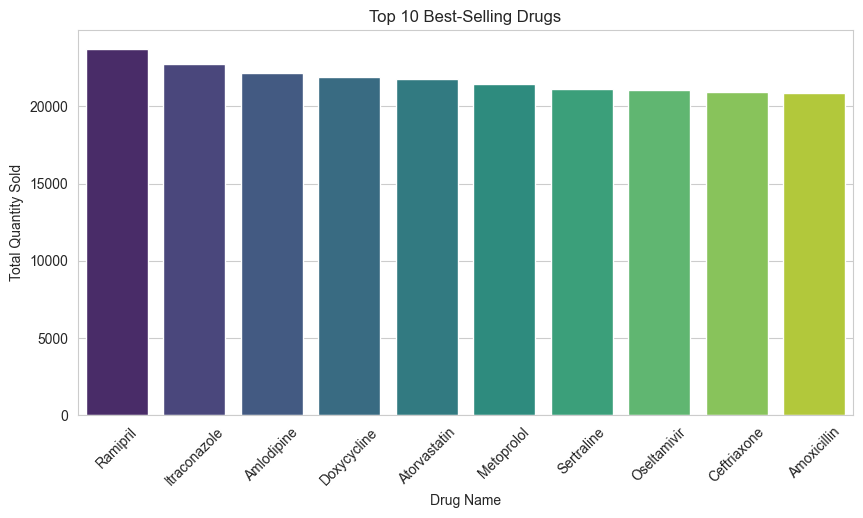

In [17]:
# Group by drug name and sum quantity sold
best_selling = sales_revenue_merged.groupby("Drug_Name")["Quantity_Sold"].sum().reset_index()

# Sort best-selling & worst-selling drugs
best_selling = best_selling.sort_values(by="Quantity_Sold", ascending=False)

# Display top & bottom 5
print("Top 5 Best-Selling Drugs:\n", best_selling.head())
print("\nBottom 5 Worst-Selling Drugs:\n", best_selling.tail())

# Bar Plot for Best-Selling Drugs
plt.figure(figsize=(10,5))
sns.barplot(x=best_selling.head(10)["Drug_Name"], y=best_selling.head(10)["Quantity_Sold"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Best-Selling Drugs")
plt.xlabel("Drug Name")
plt.ylabel("Total Quantity Sold")
plt.show()


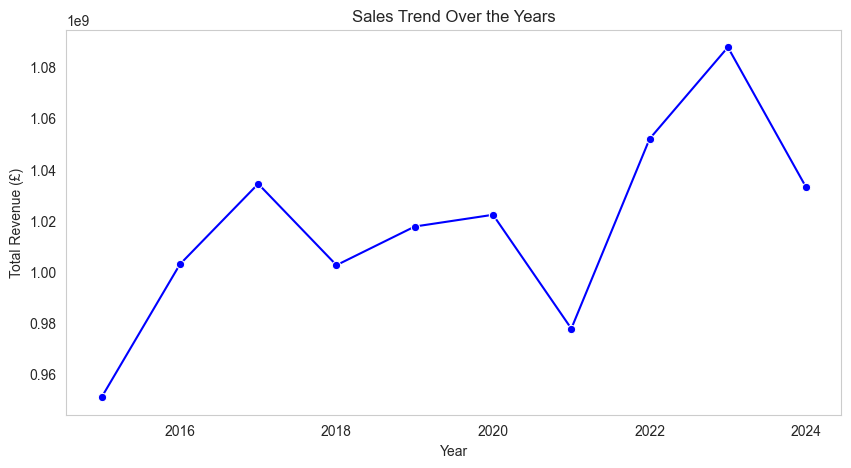

In [18]:
# Group by Year & Sum Revenue
sales_per_year = revenue_df.groupby("Year")["Total_Revenue"].sum().reset_index()

# Line Plot for Sales Trend
plt.figure(figsize=(10,5))
sns.lineplot(x=sales_per_year["Year"], y=sales_per_year["Total_Revenue"], marker="o", color="b")
plt.title("Sales Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Revenue (£)")
plt.grid()
plt.show()


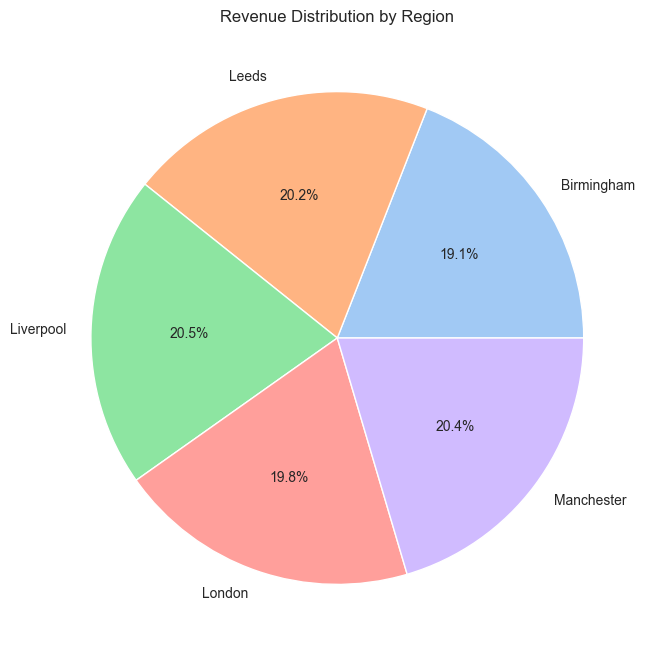

In [19]:
# Group by Region & Sum Revenue
sales_by_region = sales_df.groupby("Region")["Revenue"].sum().reset_index()

# Pie Chart for Sales by Region
plt.figure(figsize=(8,8))
plt.pie(sales_by_region["Revenue"], labels=sales_by_region["Region"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Revenue Distribution by Region")
plt.show()


C:\Users\Ejiro\AppData\Local\Temp\ipykernel_30200\168758155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue["Category"], y=category_revenue["Revenue"], palette="coolwarm")


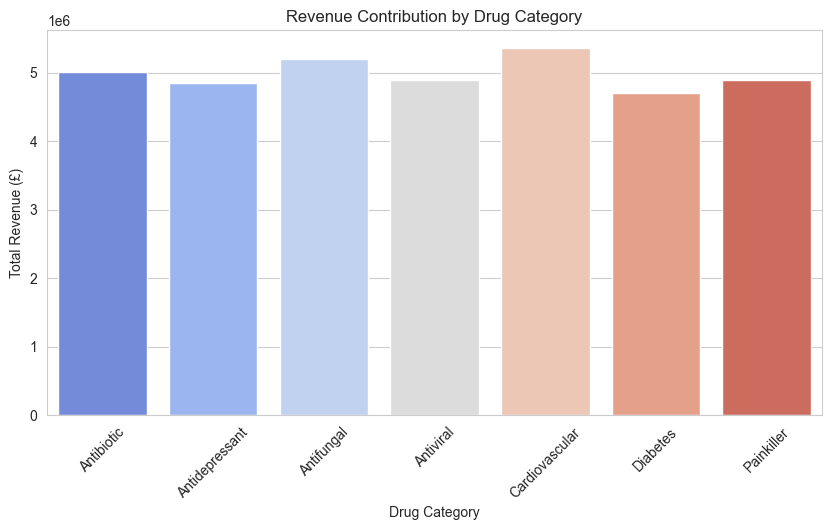

In [20]:
# Group by category & sum revenue
category_revenue = sales_revenue_merged.groupby("Category")["Revenue"].sum().reset_index()

# Bar Plot for Revenue by Drug Category
plt.figure(figsize=(10,5))
sns.barplot(x=category_revenue["Category"], y=category_revenue["Revenue"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Revenue Contribution by Drug Category")
plt.xlabel("Drug Category")
plt.ylabel("Total Revenue (£)")
plt.show()


In [21]:
# Generate Business Insights
print(" The best-selling drug is:", best_selling.iloc[0]["Drug_Name"])
print(" The worst-selling drug is:", best_selling.iloc[-1]["Drug_Name"])
print(" Highest revenue was generated in the year:", sales_per_year.iloc[-1]["Year"])
print(" The region contributing the most revenue is:", sales_by_region.iloc[sales_by_region["Revenue"].idxmax()]["Region"])
print(" The most profitable drug category is:", category_revenue.iloc[category_revenue["Revenue"].idxmax()]["Category"])


 The best-selling drug is: Ramipril
 The worst-selling drug is: Tramadol
 Highest revenue was generated in the year: 2024.0
 The region contributing the most revenue is: Liverpool
 The most profitable drug category is: Cardiovascular
